# VESTIAIRE COLLECTIVE ANALYSIS: Part 4 *Unsupervised Machine Learning: Clustering*

### Install and Import libraries

In [81]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl

### Import & Clean data

In [236]:
path = r'C:\Users\Nuria Miquel\Desktop\nuria\Data Analysis\Vestiaire Collective'
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared', 'vestiaire_prep.csv'), index_col = False)
df_sellers = pd.read_csv(os.path.join(path, 'Data', 'Prepared', 'sellers.csv'), index_col = False)

In [238]:
df.dtypes

product_id                      int64
product_type                   object
product_name                   object
product_description            object
product_keywords               object
product_gender_target          object
product_category               object
product_season                 object
product_condition              object
product_like_count              int64
sold                             bool
reserved                         bool
available                        bool
in_stock                         bool
should_be_gone                   bool
brand_id                        int64
brand_name                     object
brand_url                      object
product_material               object
product_color                  object
price_usd                     float64
seller_price                  float64
seller_earning                float64
seller_badge                   object
has_cross_border_fees            bool
buyers_fees                   float64
warehouse_na

In [240]:
df.columns

Index(['product_id', 'product_type', 'product_name', 'product_description',
       'product_keywords', 'product_gender_target', 'product_category',
       'product_season', 'product_condition', 'product_like_count', 'sold',
       'reserved', 'available', 'in_stock', 'should_be_gone', 'brand_id',
       'brand_name', 'brand_url', 'product_material', 'product_color',
       'price_usd', 'seller_price', 'seller_earning', 'seller_badge',
       'has_cross_border_fees', 'buyers_fees', 'warehouse_name', 'seller_id',
       'seller_username', 'usually_ships_within', 'seller_country',
       'seller_products_sold', 'seller_num_products_listed',
       'seller_community_rank', 'seller_num_followers', 'seller_pass_rate',
       'like_count_range', 'price_range'],
      dtype='object')

In [242]:
df_num_only = df[['product_id', 'product_like_count', 'brand_id','price_usd', 'seller_price', 
               'seller_earning', 'buyers_fees', 'seller_id',
               'seller_products_sold', 'seller_num_products_listed',
               'seller_community_rank', 'seller_num_followers', 'seller_pass_rate']]

In [244]:
df_num_only.max()

product_id                    43248835.00
product_like_count                3154.00
brand_id                         18237.00
price_usd                       632610.00
seller_price                    527175.00
seller_earning                  509229.75
buyers_fees                     105435.00
seller_id                     26081768.00
seller_products_sold             79738.00
seller_num_products_listed       39628.00
seller_community_rank          1064736.00
seller_num_followers          14179115.00
seller_pass_rate                   100.00
dtype: float64

In [393]:
df_num_only = df_num_only[(df_num_only['seller_num_followers'] <= 100000) &
                           (df_num_only['price_usd'] <= 400000) &
                           (df_num_only['seller_num_products_listed'] <= 10000) &
                           (df_num_only['product_like_count'] <= 1000)]

In [395]:
df_num_only.max()

product_id                    43248835.00
product_like_count                 912.00
brand_id                         18237.00
price_usd                       183796.73
seller_price                    153163.95
seller_earning                  147154.56
buyers_fees                      30632.79
seller_id                     26081768.00
seller_products_sold             23235.00
seller_num_products_listed        9940.00
seller_community_rank          1064736.00
seller_num_followers             43202.00
seller_pass_rate                   100.00
clusters                             5.00
dtype: float64

In [397]:
df_num_only.shape

(866245, 14)

#### Strandarizing Data
Because of the large diference in scales between columnsI'll be standarizing the datawith the Sklearn library.

In [400]:
scaler = StandardScaler()

In [402]:
df_stdr = scaler.fit_transform(df_num_only)

### Elbow Technique

In [405]:
# Guessing the number of clusters
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [407]:
# Score that shows the rate of variation for each cluster option
score = [kmeans[i].fit(df_stdr).score(df_stdr) for i in range(len(kmeans))]
score

[-12127430.00000002,
 -10731568.948740384,
 -9543394.807502396,
 -7932022.840915606,
 -7431779.801309999,
 -6748147.631532649,
 -6391176.062814719,
 -5875931.707610466,
 -5339949.217166109]

Text(0.5, 1.0, 'Elbow Technique')

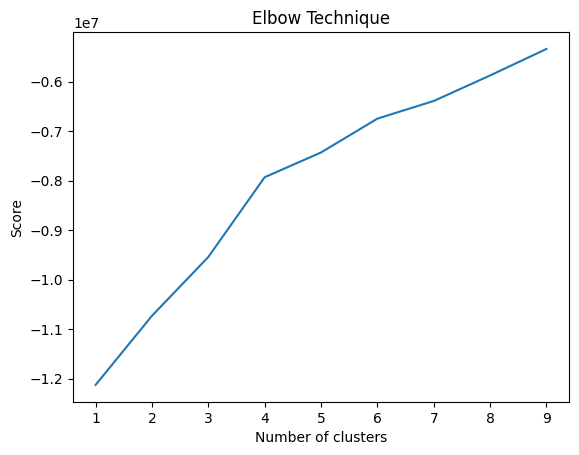

In [408]:
pl.plot(num_cl, score)
pl.xlabel('Number of clusters')
pl.ylabel('Score')
pl.title('Elbow Technique')

**Number of Clusters**

The plot result is very linear but there is a slightly stronger angle in number 4 that suggests that from that point differences in between clusters grow slower, thats why I will choose 4 as the number of clusters for the analysis.

### K-means Algorithm

In [430]:
kmeans = KMeans(n_clusters = 4) 

In [431]:
kmeans.fit(df_num_only)

KMeans(n_clusters=4)

In [432]:
df_num_only['clusters'] = kmeans.fit_predict(df_num_only)

C:\Users\solving\AppData\Local\Temp\ipykernel_20232\3981912150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num_only['clusters'] = kmeans.fit_predict(df_num_only)


In [433]:
df_num_only.head()

,product_id,product_like_count,brand_id,price_usd,seller_price,seller_earning,buyers_fees,seller_id,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate,clusters
0,43247626,34,117,272.92,223.65,216.94,23.97,25775970,3,14,0,13,0.0,3
1,43247441,1,161,127.80,106.50,106.50,21.30,13698770,0,0,0,8,0.0,0
2,43246517,2,391,1278.00,1065.00,926.55,213.00,6042365,58,69,0,62,96.0,2
3,43246507,0,2797,163.90,149.00,126.65,14.90,13172949,63,274,126346,131,96.0,0
4,43246417,1,11956,119.72,99.77,83.55,19.95,2578605,19,14,102821,40,89.0,2


In [434]:
df_num_only['clusters'].value_counts()

clusters
0    274468
2    233094
3    221951
1    136732
Name: count, dtype: int64

### Visualizations

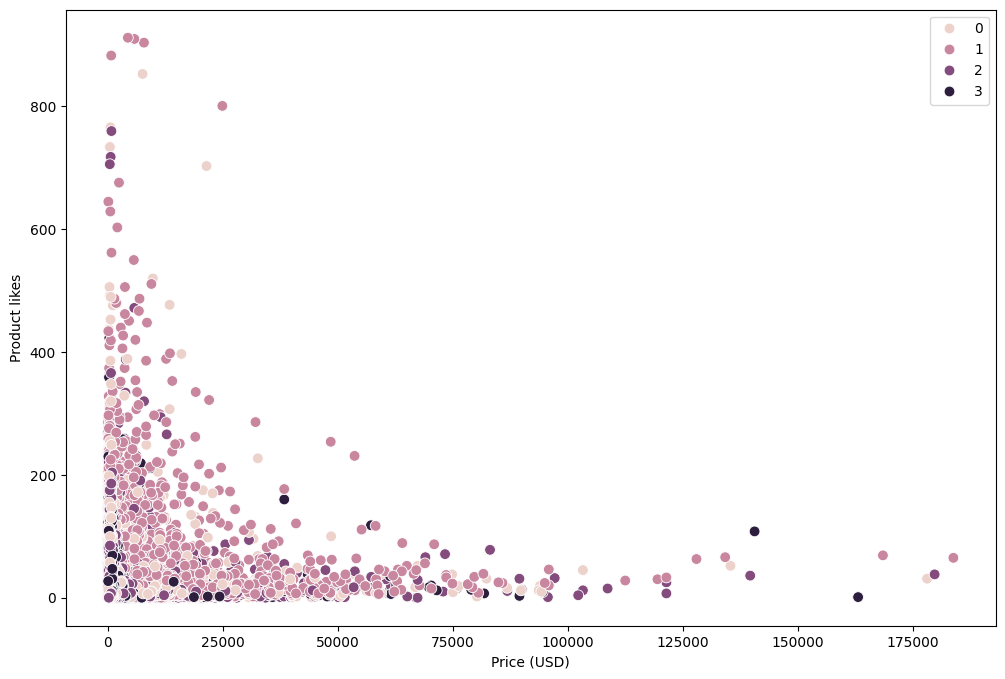

In [436]:
# Plotting the clusters for different variables
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_num_only['price_usd'], y = df_num_only['product_like_count'], hue = kmeans.labels_, s = 60) 

plt.xlabel('Price (USD)')
plt.ylabel('Product likes')
plt.show()

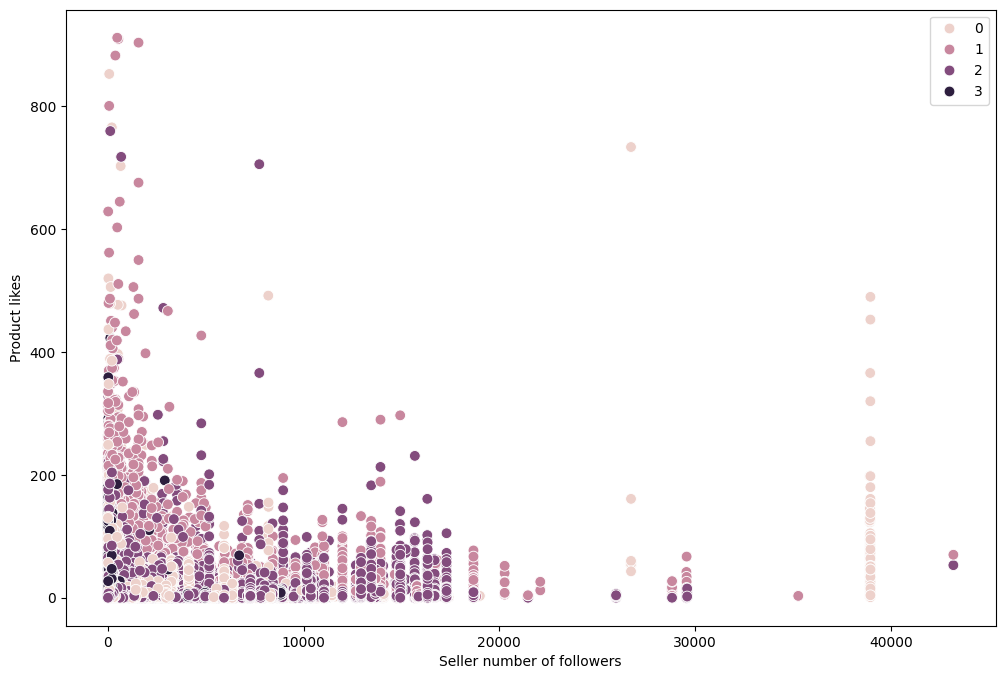

In [437]:
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_num_only['seller_num_followers'], y = df_num_only['product_like_count'], hue = kmeans.labels_, s = 60) 

plt.xlabel('Seller number of followers')
plt.ylabel('Product likes')
plt.show()

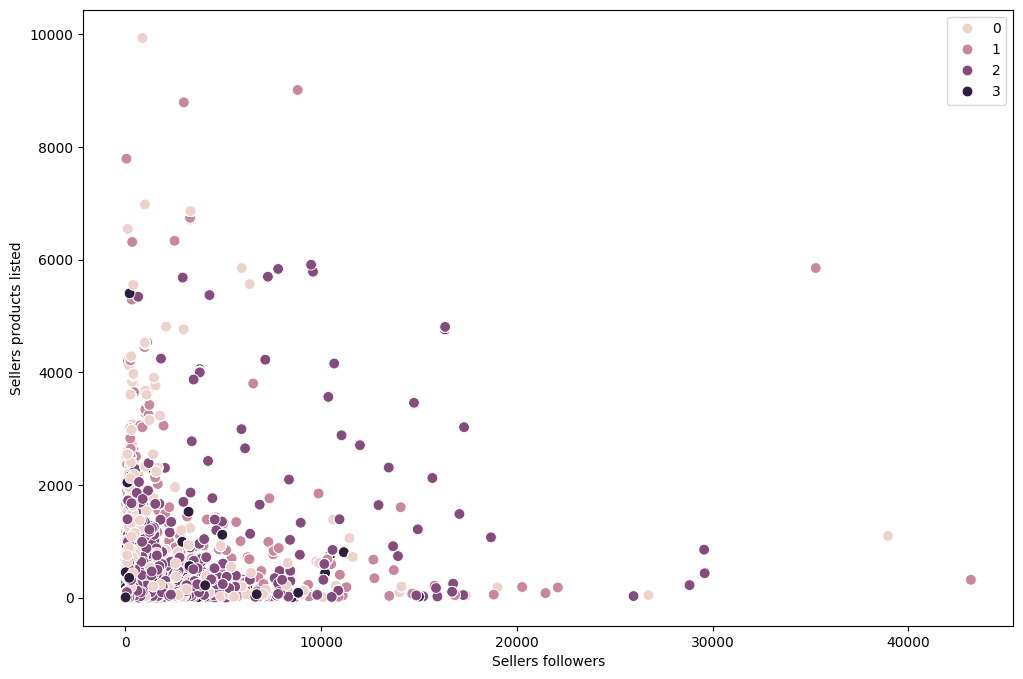

In [438]:
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_num_only['seller_num_followers'], y = df_num_only['seller_num_products_listed'], hue = kmeans.labels_, s = 60) 

plt.xlabel('Sellers followers')
plt.ylabel('Sellers products listed')
plt.show()

In [454]:
df_num_only.loc[df_num_only['clusters'] == 0, 'cluster'] = 'light pink'
df_num_only.loc[df_num_only['clusters'] == 1, 'cluster'] = 'pink'
df_num_only.loc[df_num_only['clusters'] == 2, 'cluster'] = 'light purple'
df_num_only.loc[df_num_only['clusters'] == 3, 'cluster'] = 'purple'

C:\Users\solving\AppData\Local\Temp\ipykernel_20232\2597506540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num_only.loc[df_num_only['clusters'] == 0, 'cluster'] = 'light pink'


In [460]:
df_num_only.groupby('cluster').agg({'price_usd':['mean', 'median'], 
                                    'product_like_count':['mean', 'median'], 
                                    'seller_num_followers':['mean', 'median'],
                                    'seller_num_products_listed':['mean', 'median']})

price_usd         product_like_count         \
                    mean  median               mean median   
cluster                                                      
light pink    405.837153  185.31           5.324592    2.0   
light purple  409.425389  191.70           6.525054    3.0   
pink          444.483279  152.90          11.141847    5.0   
purple        301.031287  130.20           4.873828    2.0   

             seller_num_followers        seller_num_products_listed         
                             mean median                       mean median  
cluster                                                                     
light pink             441.858690   73.0                 814.852923   75.0  
light purple           847.560898  108.0                 441.493346   36.0  
pink                   825.553360  205.0                 729.940014  153.0  
purple                  89.947934   15.0                 155.544990   18.0

### Conclusion

Having analyzed these clusters I realize there are some relationships between variables. 

The group with thw highest number of followers, **'pink'** is also the one with the highest number of products listed, while **'purple'** have both the lowest numbers in these variables. **'pink'** is also the one with the highest score in product like count and again **'purple'** has the lowest.
It's also true that these are only visibile in the table with the aggregated values grouped by cluster and I could not percive them with the scatterplots. I believe this might be due, at least partially, to the fact that there are more than 850000 values in the plot, making it difficult to read.

On the other hand, I couldn't find any clear relationship between price and product like count using this cluster method.